# Temporal Demand Patterns and Seasonality

In this notebook we demonstrate how fleet usage varies during a day, a week, the year and throughout the seasons. We describe the patterns that we observed and provide an explanation.

## 1 Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta, date, time
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Load Bike Dataset

In [2]:
df_chicago = pd.read_csv('../../dataset/chicago_2018_clean.csv') 
df_chicago

start_time             end_time  start_station_id  \
0        2018-04-01 00:04:44  2018-04-01 00:13:03                22   
1        2018-04-01 00:06:42  2018-04-01 00:27:07               157   
2        2018-04-01 00:07:19  2018-04-01 00:23:19               106   
3        2018-04-01 00:07:33  2018-04-01 00:14:47               241   
4        2018-04-01 00:10:23  2018-04-01 00:22:12               228   
...                      ...                  ...               ...   
3599456  2018-03-31 23:46:34  2018-04-01 00:05:24               158   
3599457  2018-03-31 23:47:43  2018-03-31 23:52:05               299   
3599458  2018-03-31 23:50:18  2018-03-31 23:57:38               327   
3599459  2018-03-31 23:52:26  2018-04-01 00:07:13               265   
3599460  2018-03-31 23:53:38  2018-04-01 00:03:08               485   

         end_station_id                start_station_name  \
0                   171                May St & Taylor St   
1                   190    Lake Shore Dr & Wellington Ave   
2                   106             State St & Pearson St   
3                   171               Morgan St & Polk St   
4                   219           Damen Ave & Melrose Ave   
...                 ...                               ...   
3599456             260      Milwaukee Ave & Wabansia Ave   
3599457             229            Halsted St & Roscoe St   
3599458             226       Sheffield Ave & Webster Ave   
3599459             426  Cottage Grove Ave & Oakwood Blvd   
3599460             475       Sawyer Ave & Irving Park Rd   

                       end_station_name  bike_id   user_type  \
0                 May St & Cullerton St     3819  Subscriber   
1        Southport Ave & Wrightwood Ave     5000  Subscriber   
2                 State St & Pearson St     5165    Customer   
3                 May St & Cullerton St     3851  Subscriber   
4               Damen Ave & Cortland St     5065  Subscriber   
...                                 ...      ...         ...   
3599456      Kedzie Ave & Milwaukee Ave     1935  Subscriber   
3599457       Southport Ave & Roscoe St     5852  Subscriber   
3599458        Racine Ave & Belmont Ave     4414  Subscriber   
3599459             Ellis Ave & 60th St     6448  Subscriber   
3599460    Washtenaw Ave & Lawrence Ave     2769  Subscriber   

        duration_per_trip  trip_time_in_hours  
0         0 days 00:08:19            0.138611  
1         0 days 00:20:25            0.340278  
2         0 days 00:16:00            0.266667  
3         0 days 00:07:14            0.120556  
4         0 days 00:11:49            0.196944  
...                   ...                 ...  
3599456   0 days 00:18:50            0.313889  
3599457   0 days 00:04:22            0.072778  
3599458   0 days 00:07:20            0.122222  
3599459   0 days 00:14:47            0.246389  
3599460   0 days 00:09:30            0.158333  

[3599461 rows x 10 columns]

In order to get detailed plots, we need to extract information about the time dimension from the column 'start_time'.

In [3]:
#Convert into datetime objects
df_chicago['Time'] = pd.to_datetime(df_chicago['start_time']).dt.time
df_chicago["Hour"] = pd.to_datetime(df_chicago["start_time"]).dt.hour
df_chicago["Month"]= pd.to_datetime(df_chicago["start_time"]).dt.month
df_chicago["Weekday"]= pd.to_datetime(df_chicago["start_time"]).dt.dayofweek
df_chicago['Day'] = pd.to_datetime(df_chicago['start_time']).dt.date
df_chicago["Day"]= pd.to_datetime(df_chicago["Day"])

## 2 Fleet Usage During a Day

Text(0, 0.5, 'Bike Trips')

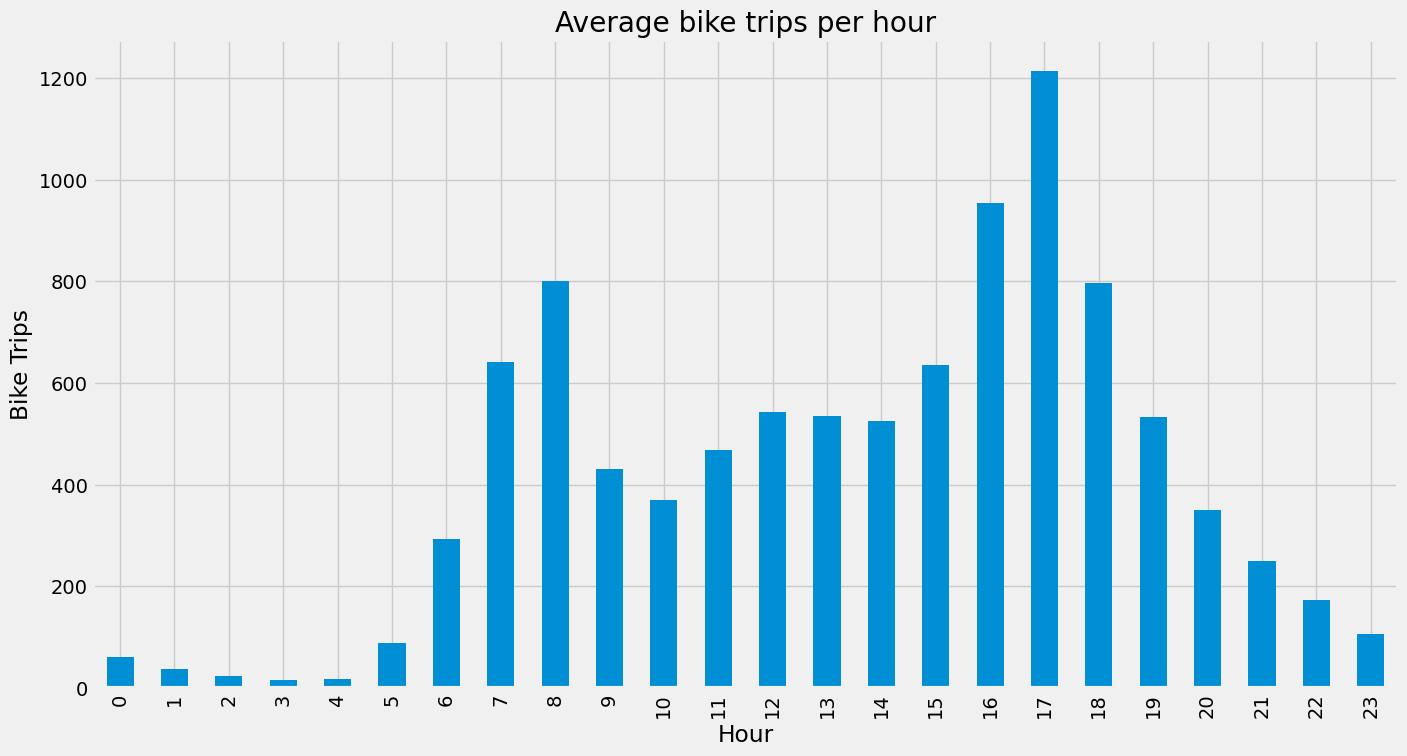

In [4]:
#Calculate average bike trips per Hour as bar plot
plt.style.use("fivethirtyeight")
 
# Setting figure size to 15, 8
plt.figure(figsize=(15, 8))

bikes_by_hours = df_chicago.groupby(['Hour'])['bike_id'].count().div(365)
ax = bikes_by_hours.plot(title ="Average bike trips per hour", legend=False, kind = "bar")
ax.set_xlabel("Hour")
ax.set_ylabel("Bike Trips")

We can see that the demand of bike trips have its peak between 7am and 8am & also between 4pm and 6pm during a day. This leads to the assumption that most trips are used for commuting to work and after work.

In [5]:
#Calculate average bike trips per Hour of Day
plt.style.use("fivethirtyeight")
 
# Setting figure size to 15, 5
plt.figure(figsize=(15, 5))

a= df_chicago[["Day","Hour", "bike_id"]]
b = a.groupby(["Day","Hour"])["bike_id"].count().groupby(["Hour"]).mean()
ax= b.plot(title ="AVG Trips per Hour of the Day")
ax.set_xlabel("Hours of a day")
ax.set_ylabel("AVG Trips")

Text(0, 0.5, 'AVG Trips')

To get a better overview, we use 2 different plots to show the demand of bike trips during a day. The second plot shows that the demand for trips starts to increase at 5am till 8am. Than, it decreases till 10am and starts to increase till 5pm, where this is the time of the day where the demand is the highest on average.

## 3 Fleet Usage During a Year

Text(0, 0.5, 'Bike Trips')

<Figure size 5000x3000 with 0 Axes>

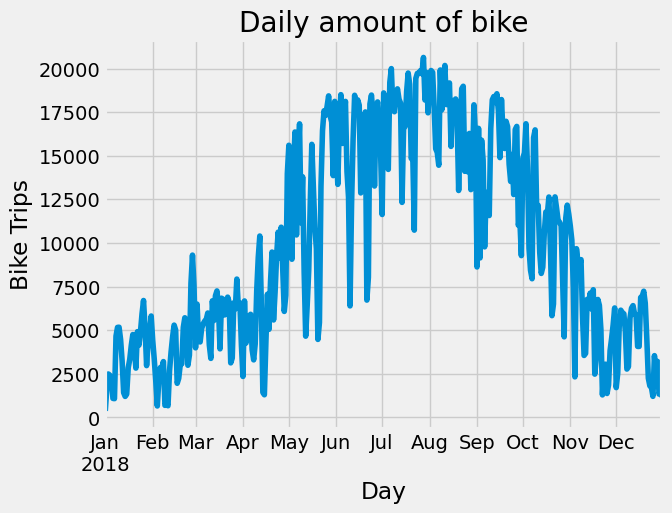

In [6]:
# Count bike trips by Day of whole year
plt.style.use("fivethirtyeight")
 
# Setting figure size to 15, 10
plt.figure(figsize=(50, 30))

bikes_by_day = df_chicago.pivot_table("bike_id", aggfunc='count', index="Day" )
ax = bikes_by_day.plot(title ="Daily amount of bike", legend=False)
ax.set_xlabel("Day")
ax.set_ylabel("Bike Trips")

During a year, the demand of bike trips starts to increase from April and starts to decrease from August. Between October and December, the number of bike trips is quite low which can be reasonable due to the weather conditions. Also it is interesting that within the months where the demand is very high,the number of bike trips decreases rapidly and increases later on. We assume that besides these months, weather conditions (eg. rainy days) have an influence on bike trips on these months.

## 4 Fleet Usage During a Week

In [7]:
#Weekly
bikes_by_weekday = bikes_by_day.groupby(bikes_by_day.index.dayofweek).mean()
bikes_by_weekday= bikes_by_weekday.rename(index={0: "Mo", 1: "Tu",2: "We",3: "Th",4: "Fr",5: "Sa",6: "Su"})

In [8]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(10, 10))
ax= bikes_by_weekday.plot(title ="Avg Bike Trips (weekly)", legend=False)
ax.set_ylabel("Bike Trips")
ax.set_xlabel("Weekday")

Text(0.5, 0, 'Weekday')

<Figure size 1000x1000 with 0 Axes>

Based on the plot, it can be seen that many users have the preference to rent a bike within the week instead of during weekends. To prove this statement, the next plot splits the bike usage on weekdays and weekends.
By showing the demand of bike trips on a weekly basis, we see that the amount of rented bikes are higher during a week rather than on weekends. Wednesday is the day where the most trips are made. Between Friday to Sunday, the number of trips decreases.

Text(0, 0.5, 'Average Bike Trips per Hour')

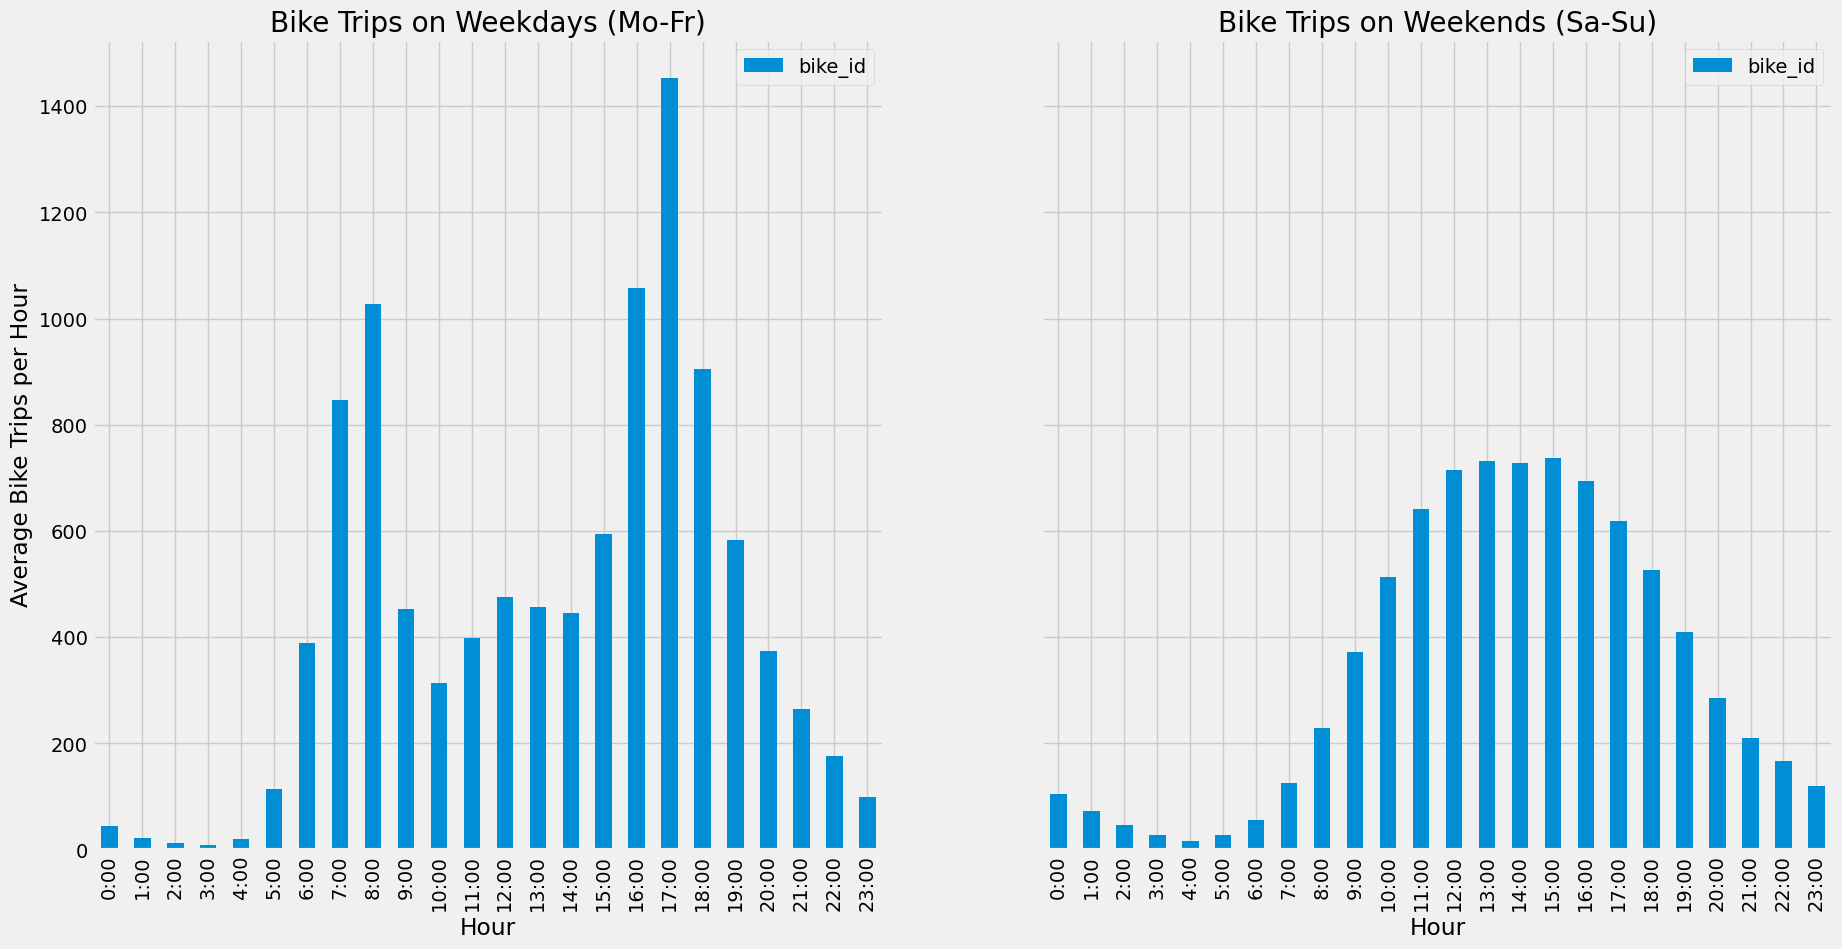

In [9]:
#Plot average Bike Trips per Hour and Split between Weekdays and Weekends
hour = df_chicago.pivot_table('bike_id', aggfunc='count',index=['Hour','Day']).fillna(0).reset_index('Hour')

hour['weekend'] = (hour.index.dayofweek >= 5)
hour = hour.groupby(['weekend', 'Hour']).mean()
hour.index.set_levels([['weekday', 'weekend'],
                          ["{0}:00".format(x) for x in range(24)]], inplace=True);
hour.columns.name = None

#Create Subplots as bars
fig, ax = plt.subplots(1, 2, figsize=(20, 10), sharey=True)
hour.loc['weekday'].plot(title='Bike Trips on Weekdays (Mo-Fr)', ax=ax[0], kind = 'bar')
hour.loc['weekend'].plot(title='Bike Trips on Weekends (Sa-Su)', ax=ax[1], kind = 'bar')
ax[0].set_ylabel('Average Bike Trips per Hour')

By splitting the days into weekdays and weekends, we have a good overview about the number of bike trips per hour. Comparing both plots, it is obvious that the demand of renting bikes is much higher on weekdays rather than on weekends. On weekdays, the highest number of bike trips are between 6am till 7am and between 4pm and 5pm. On weekends, the demand for bikes starts to increase linearly from 8am till 12am and is nearly constant till 3pm after its decrease linearly till midnight.

## 5 Fleet Usage on Montly Basis

<Figure size 1500x1500 with 0 Axes>

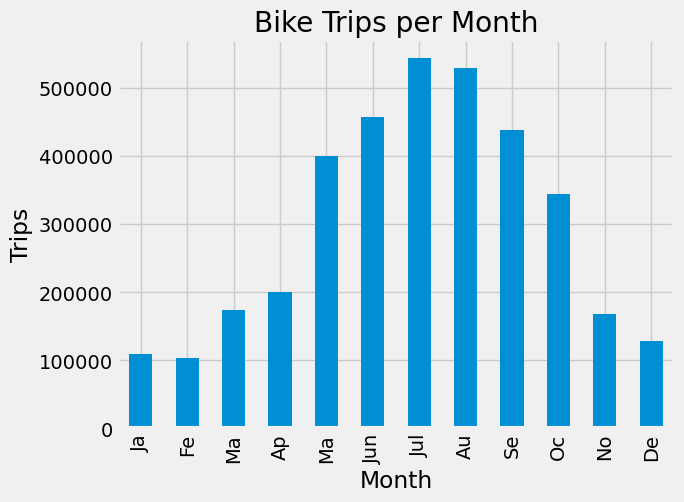

In [10]:
# Using a inbuilt style to change the look and feel of the plot
plt.style.use("fivethirtyeight")
 
# Setting figure size to 15, 15
plt.figure(figsize=(15, 15))

# Labelling the axes and settings
monthly_trips = df_chicago.pivot_table("bike_id", aggfunc='count', index="Month" )
monthly_trips = monthly_trips.rename(index={1: "Ja", 2: "Fe",3: "Ma",4: "Ap",5: "Ma",6: "Jun",7: "Jul", 8: "Au", 9: "Se", 10: "Oc",11: "No", 12: "De"})
ax = monthly_trips.plot(title ="Bike Trips per Month", legend=False, kind = 'bar')
ax.set_ylabel('Trips')
plt.show()

Between the months May till October, the demand of bike trips is very high. Especially on the months July and August, there are the highest demand of renting bikes. 

## 6 Fleet Usage Based on Seasons

<Figure size 4000x4000 with 0 Axes>

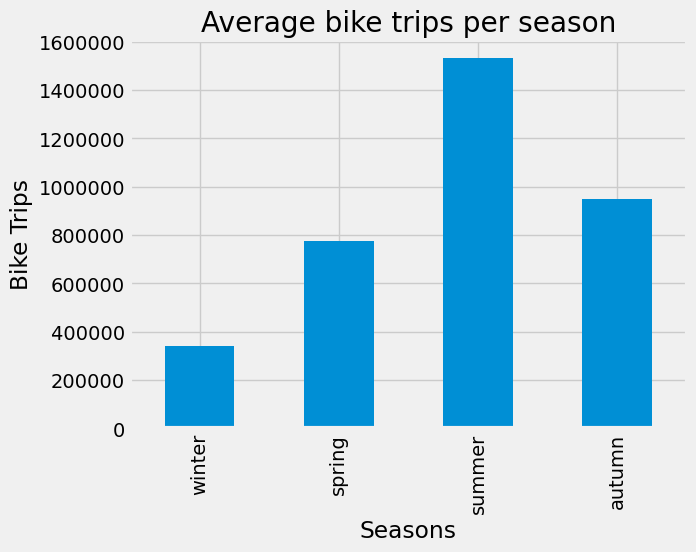

In [11]:
# setting figure size to 15, 15
plt.figure(figsize=(40, 40))
 
# Labelling the axes and setting
x = df_chicago.copy()
x["season"] = x.Day.dt.month%12 // 3 + 1
season_time = x.pivot_table("bike_id", aggfunc ='count', index = "season" )
season_time = season_time.rename(index={ 1: "winter",2: "spring", 3: "summer", 4:"autumn"})
ax = season_time.plot(title ="Average bike trips per season", legend=False, kind ="bar")
ax.set_ylabel("Bike Trips")
ax.set_xlabel("Seasons")

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

Based on the plot, it is obvious that users will take bike trips more often in summer than on any other seasons.